# Lead Score camiones empresas

In [1]:
#referencias:
#https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
#https://www.kaggle.com/tboyle10/methods-for-dealing-with-imbalanced-data
#https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b


#Area de Analytics - Comercial Kaufmann
#creado por Sebastian Alibaud



# CARGA DE PAQUETES

In [2]:
# quitamos alertas porfavor!
import warnings
warnings.filterwarnings('ignore')

In [3]:
# librerias clasicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ploteos
from matplotlib.pyplot import xticks
%matplotlib inline
from sklearn.metrics import roc_curve,confusion_matrix,accuracy_score,recall_score
from sklearn.metrics import f1_score,precision_score,roc_auc_score,average_precision_score


#modelos
from sklearn.model_selection import train_test_split
from  sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
#from sklearn.svm import SVC
#from sklearn.linear_model import RidgeClassifier,SGDClassifier,LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,average_precision_score
#from sklearn.neighbors import NearestNeighbors
import xgboost as xgb


### Funciones utiles

In [4]:
#funciones para medir

def mediciones(x_train,y_train,x_test,y_test,model):
    a = int(accuracy_score(y_train,model.predict(x_train))*1000)/1000
    b = int(recall_score(y_train,model.predict(x_train))*1000)/1000
    c = int(accuracy_score(y_test,model.predict(x_test))*1000)/1000
    d = int(recall_score(y_test,model.predict(x_test))*1000)/1000
    aa = int(roc_auc_score(y_train,model.predict_proba(x_train)[:,1])*1000)/1000
    cc = int(roc_auc_score(y_test,model.predict_proba(x_test)[:,1])*1000)/1000
    dd = int(f1_score(y_test,model.predict(x_test))*1000)/1000
    ee = int(f1_score(y_train,model.predict(x_train))*1000)/1000
    e = {'Entrenamiento':[a,b,aa,ee],
         'Testeo':[c,d,cc,dd]}
    f = pd.DataFrame(data=e,index=["Accuracy","recall","roc","f1"])
    matrix=confusion_matrix(y_test,model.predict(x_test))
    TP=matrix[1,1]
    TN=matrix[0,0]
    FP=matrix[0,1]
    FN=matrix[1,0]
    ma = {'Prediccion falso':[TN,FN],
         'Prediccion verdadero':[FP,TP]}
    i = pd.DataFrame(data=ma,index=["Actual falsa","Actual verdadera"])
    print("Matriz de confusion:\n",i)
    return f



#print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
#fig= plt.figure(figsize=(6,3))# to plot the graph
#print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
#print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
#print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
#print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal


def mediciones2(x_train,y_train,x_test,y_test,model):
    #a = int(accuracy_score(y_train,model.predict(x_train))*1000)/1000
    #b = int(recall_score(y_train,model.predict(x_train))*1000)/1000
    c = int(accuracy_score(y_test,model.predict(x_test))*1000)/1000
    d = int(recall_score(y_test,model.predict(x_test))*1000)/1000
    #aa = int(roc_auc_score(y_train,model.predict_proba(x_train)[:,1])*1000)/1000
    #cc = int(roc_auc_score(y_test,model.predict_proba(x_test)[:,1])*1000)/1000
    e = {'Testeo':[c,d]}
    f = pd.DataFrame(data=e,index=["Accuracy","recall"])
    return f

def roc_(x_train,y_train,x_test,y_test,model):
    aa = int(roc_auc_score(y_train,model.predict_proba(x_train)[:,1])*1000)/1000
    cc = int(roc_auc_score(y_test,model.predict_proba(x_test)[:,1])*1000)/1000
    e = {'Entrenamiento':[a],
         'Testeo':[c]}
    f = pd.DataFrame(data=e,index=["roc-auc"])
    return f

# Preparación de datos
### LECTURA DE BASE BRUTA DESDE SAS


La base de datos se obtiene desde el SAS guardado en la carpeta diaria de Customer analytics, esta base considera todas las ofertas realizadas en kaufmann a clientes que se encuentran en el perfil, se cruza con información de venta, rvm, post venta y datos del SII.


Para el caso de puesta en prd, se consideran todas las empresas presentes en SII mas todos los clientes kaufman, mas todas las personas que están en rvm.


* Periodo de información = 2018 y 2019.
* Modelos: Utilitarios.
* Tipo Cliente: Persona y empresa.

Fuente sii:
http://www.sii.cl/sobre_el_sii/nominapersonasjuridicas.html



In [9]:
#----------------------#
# carga de informacion #
#----------------------#
#lectura de datos
df = pd.read_sas(r"file:\\10.1.1.145\datos\ANALISIS\CHILE\IMPORTER_MARKETING_CUSTOMER_ANALYTICS\DATOS\LEAD_SCORE_UTILITARIOS_PREV1.sas7bdat",
                    format='sas7bdat',encoding='latin1')

df = df[df['TIPO_CLIENTE']!='PERSONA']
df=df[df['CATEGORIA']=='CAMION']

df=df.drop(['TIPO_CLIENTE'], axis=1)

In [10]:
df=df.drop(["CATEGORIA"], axis=1)
df.shape

(107726, 33)

### LIMPIEZA DE DATOS GENERAL

In [11]:
#porcentaje de missing
#round(100*(df.isnull().sum()/len(df.index)), 2)
#porcentaje de missing
round(100*(df.isnull().sum()/len(df.index)), 2)

RUBRO_ECON                   0.00
ANTIGUEDAD_E                 0.00
TRAMO_VENTA                 18.71
NUM_TRABAJADORES            18.71
TOTAL_UTILITARIOS           42.83
UTILITARIOS_EXCLUSION       50.14
RELEVANTE_BUSES             96.69
RELEVANTE_CAMIONES          52.23
RELEVANTE_RODADOS           79.18
RELEVANTE_VANS              80.35
RELEVANTE_CARGA             85.14
RELEVANTE_PASAJERA          90.77
RELEVANTE_PESADO            61.08
RELEVANTE_CAMIONETA         91.92
RELEVANTE_MEDIANO           80.92
RELEVANTE_OTROS             68.02
RELEVANTE_LIVIANO           93.05
RELEVANTE_CAMIONETA_DCAB    97.17
RELEVANTE_FORESTAL          97.25
RELEVANTE_CAMABAJA          95.12
MARCA_AGRUPADA               0.00
FLOTA_NUEVA                 42.83
ANTIGUEDAD_FLOTA            42.83
COMPRO_NUM                   0.00
CAMPANAS_U180D              69.74
CAMPANAS_U180D_C            70.35
SERVICIOS_PV                 0.00
REGION                       1.52
USADO_NUEVO                  0.00
DESC_TIPO_VEHI

In [12]:
#no elimino estos datos porque vienen de rvm, miss significa que no tiene
df['RELEVANTE_BUSES'] = df['RELEVANTE_BUSES'].replace(np.nan,0)
df['RELEVANTE_CAMIONES'] = df['RELEVANTE_CAMIONES'].replace(np.nan,0)
df['RELEVANTE_RODADOS'] = df['RELEVANTE_RODADOS'].replace(np.nan,0)
df['RELEVANTE_VANS'] = df['RELEVANTE_VANS'].replace(np.nan,0)
df['RELEVANTE_CARGA'] = df['RELEVANTE_CARGA'].replace(np.nan,0)
df['RELEVANTE_PASAJERA'] = df['RELEVANTE_PASAJERA'].replace(np.nan,0)
df['RELEVANTE_PESADO'] = df['RELEVANTE_PESADO'].replace(np.nan,0)
df['RELEVANTE_CAMIONETA'] = df['RELEVANTE_CAMIONETA'].replace(np.nan,0)
df['RELEVANTE_MEDIANO'] = df['RELEVANTE_MEDIANO'].replace(np.nan,0)
df['RELEVANTE_OTROS'] = df['RELEVANTE_OTROS'].replace(np.nan,0)
df['RELEVANTE_LIVIANO'] = df['RELEVANTE_LIVIANO'].replace(np.nan,0)
df['RELEVANTE_CAMIONETA_DCAB'] = df['RELEVANTE_CAMIONETA_DCAB'].replace(np.nan,0)
df['RELEVANTE_FORESTAL'] = df['RELEVANTE_FORESTAL'].replace(np.nan,0)
df['RELEVANTE_CAMABAJA'] = df['RELEVANTE_CAMABAJA'].replace(np.nan,0)
#porcentaje de missing
round(100*(df.isnull().sum()/len(df.index)), 2)

RUBRO_ECON                   0.00
ANTIGUEDAD_E                 0.00
TRAMO_VENTA                 18.71
NUM_TRABAJADORES            18.71
TOTAL_UTILITARIOS           42.83
UTILITARIOS_EXCLUSION       50.14
RELEVANTE_BUSES              0.00
RELEVANTE_CAMIONES           0.00
RELEVANTE_RODADOS            0.00
RELEVANTE_VANS               0.00
RELEVANTE_CARGA              0.00
RELEVANTE_PASAJERA           0.00
RELEVANTE_PESADO             0.00
RELEVANTE_CAMIONETA          0.00
RELEVANTE_MEDIANO            0.00
RELEVANTE_OTROS              0.00
RELEVANTE_LIVIANO            0.00
RELEVANTE_CAMIONETA_DCAB     0.00
RELEVANTE_FORESTAL           0.00
RELEVANTE_CAMABAJA           0.00
MARCA_AGRUPADA               0.00
FLOTA_NUEVA                 42.83
ANTIGUEDAD_FLOTA            42.83
COMPRO_NUM                   0.00
CAMPANAS_U180D              69.74
CAMPANAS_U180D_C            70.35
SERVICIOS_PV                 0.00
REGION                       1.52
USADO_NUEVO                  0.00
DESC_TIPO_VEHI

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107726 entries, 31 to 212228
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   RUBRO_ECON                107726 non-null  object 
 1   ANTIGUEDAD_E              107726 non-null  object 
 2   TRAMO_VENTA               87571 non-null   float64
 3   NUM_TRABAJADORES          87571 non-null   float64
 4   TOTAL_UTILITARIOS         61585 non-null   float64
 5   UTILITARIOS_EXCLUSION     53713 non-null   float64
 6   RELEVANTE_BUSES           107726 non-null  float64
 7   RELEVANTE_CAMIONES        107726 non-null  float64
 8   RELEVANTE_RODADOS         107726 non-null  float64
 9   RELEVANTE_VANS            107726 non-null  float64
 10  RELEVANTE_CARGA           107726 non-null  float64
 11  RELEVANTE_PASAJERA        107726 non-null  float64
 12  RELEVANTE_PESADO          107726 non-null  float64
 13  RELEVANTE_CAMIONETA       107726 non-null  

### LIMPIEZA DE DATOS POR COLUMNA 

#### columnas numericas

In [14]:
#ahora tratare de revisar cada columna para imputar en caso de que se pueda imputar
df[['TRAMO_VENTA','NUM_TRABAJADORES','TOTAL_UTILITARIOS','FLOTA_NUEVA','ANTIGUEDAD_FLOTA','CAMPANAS_U180D',
   'CAMPANAS_U180D_C','NUM_OFERTAS_U12M','COMPRAS_REALIZADAS_U12M']].describe()

,TRAMO_VENTA,NUM_TRABAJADORES,TOTAL_UTILITARIOS,FLOTA_NUEVA,ANTIGUEDAD_FLOTA,CAMPANAS_U180D,CAMPANAS_U180D_C,NUM_OFERTAS_U12M,COMPRAS_REALIZADAS_U12M
count,87571.000000,87571.000000,61585.000000,61585.000000,61585.000000,32596.000000,31938.000000,107726.000000,107726.000000
mean,9.043393,407.783821,25.366631,0.296176,3.768883,5.037643,4.876699,85.204927,8.522789
std,3.096114,971.735836,106.674503,0.456573,3.038850,6.801570,6.714604,335.036582,33.838182
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,7.000000,11.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,9.000000,63.000000,3.000000,0.000000,3.482759,3.000000,3.000000,7.000000,0.000000
75%,11.000000,351.000000,12.000000,1.000000,5.400000,6.000000,5.000000,27.000000,3.000000
max,13.000000,31416.000000,4462.000000,1.000000,19.000000,80.000000,79.000000,2528.000000,375.000000


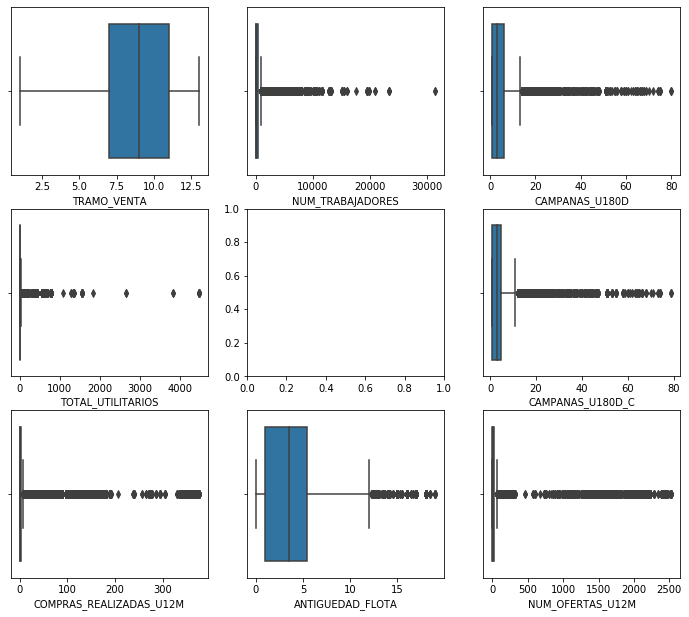

In [15]:
fig, axs = plt.subplots(3,3, figsize = (12,10.5))
plt2 = sns.boxplot(df['TRAMO_VENTA'], ax = axs[0,0])
plt2 = sns.boxplot(df['NUM_TRABAJADORES'], ax = axs[0,1])
plt2 = sns.boxplot(df['TOTAL_UTILITARIOS'], ax = axs[1,0])
plt2 = sns.boxplot(df['ANTIGUEDAD_FLOTA'], ax = axs[2,1])
plt2 = sns.boxplot(df['CAMPANAS_U180D_C'], ax = axs[1,2])
plt2 = sns.boxplot(df['NUM_OFERTAS_U12M'], ax = axs[2,2])
plt2 = sns.boxplot(df['CAMPANAS_U180D'], ax = axs[0,2])
plt2 = sns.boxplot(df['COMPRAS_REALIZADAS_U12M'], ax = axs[2,0])

plt.show()

ahi un exceso de variabilidad en algunas columnas

In [16]:
#estas variables no pueden ser imputadas porque indican que no tienen vehiculos, candidatas a irse de la base!!
df['TOTAL_UTILITARIOS'] = df['TOTAL_UTILITARIOS'].replace(np.nan,0)
df['UTILITARIOS_EXCLUSION'] = df['UTILITARIOS_EXCLUSION'].replace(np.nan,0)
df['RELEVANTE_CAMIONES'] = df['RELEVANTE_CAMIONES'].replace(np.nan,0)
df['RELEVANTE_OTROS'] = df['RELEVANTE_OTROS'].replace(np.nan,0)



df['TRAMO_VENTA'] = df['TRAMO_VENTA'].replace(np.nan, np.mean(df['TRAMO_VENTA']))
df['NUM_TRABAJADORES'] = df['NUM_TRABAJADORES'].replace(np.nan, np.mean(df['NUM_TRABAJADORES']))


### columnas categoricas

In [17]:
df[['MARCA_AGRUPADA','DESC_TIPO_VEHICULO']].describe()

,MARCA_AGRUPADA,DESC_TIPO_VEHICULO
count,107726,104766
unique,4,16
top,MERCEDES-BENZ,CAMION
freq,59478,42403


In [18]:
avr_mar=pd.DataFrame(df.groupby('MARCA_AGRUPADA')["COMPRO_NUM"].mean())
avr_mar=avr_mar.sort_values("COMPRO_NUM",ascending=False)
avr_mar.head(50)

,COMPRO_NUM
MARCA_AGRUPADA,
MERCEDES-BENZ,0.080282
FREIGHTLINER,0.059949
MITSUBISHI-FUSO,0.055086
WESTERN STAR,0.047619


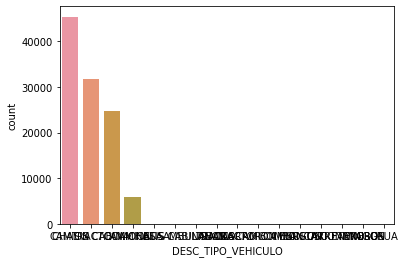

In [19]:
df['DESC_TIPO_VEHICULO'] = df['DESC_TIPO_VEHICULO'].replace(np.nan,'CAMION')
plt1 = sns.countplot(df['DESC_TIPO_VEHICULO'])
plt.show()

In [20]:
df[['FLOTA_NUEVA','ANTIGUEDAD_FLOTA']].describe()

,FLOTA_NUEVA,ANTIGUEDAD_FLOTA
count,61585.000000,61585.000000
mean,0.296176,3.768883
std,0.456573,3.038850
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,3.482759
75%,1.000000,5.400000
max,1.000000,19.000000


In [21]:
# estos valores corresponden a flotas, si estan vacion significa que no tienen flota o bien no tienen flota nueva
df['FLOTA_NUEVA'] = df['FLOTA_NUEVA'].replace(np.nan,0)

#se debe trabajar en esto
df['CAMPANAS_U180D'] = df['CAMPANAS_U180D'].replace(np.nan,0)
df['CAMPANAS_U180D_C'] = df['CAMPANAS_U180D_C'].replace(np.nan,0)
df['ANTIGUEDAD_FLOTA'] = df['ANTIGUEDAD_FLOTA'].replace(np.nan,0)

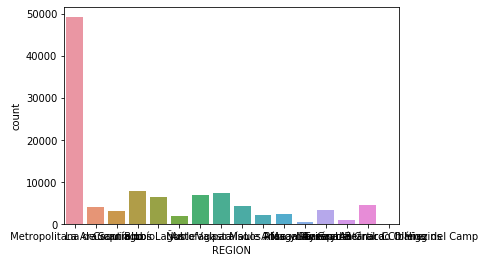

,REGION
count,106090
unique,16
top,Metropolitana de Santiago
freq,49248


In [22]:
plt1 = sns.countplot(df['REGION'])
plt.show(),
df[['REGION']].describe()

In [23]:
df['REGION'] = df['REGION'].replace(np.nan,'NA')

In [30]:
df[['DESC_TIPO_VEHICULO']].describe()

,DESC_TIPO_VEHICULO
count,107726
unique,16
top,CAMION
freq,45363


In [31]:
df['DESC_TIPO_VEHICULO'] = df['DESC_TIPO_VEHICULO'].replace(np.nan,'NA')

In [32]:
df[['TIPO_CREDITO_USADO_ANT']].describe()

,TIPO_CREDITO_USADO_ANT
count,107726
unique,8
top,NA
freq,52611


In [33]:
df['TIPO_CREDITO_USADO_ANT'] = df['TIPO_CREDITO_USADO_ANT'].replace(np.nan,'NA')

In [34]:
#cantidad de missing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107726 entries, 31 to 212228
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   RUBRO_ECON                107726 non-null  object 
 1   ANTIGUEDAD_E              107726 non-null  object 
 2   TRAMO_VENTA               107726 non-null  float64
 3   NUM_TRABAJADORES          107726 non-null  float64
 4   TOTAL_UTILITARIOS         107726 non-null  float64
 5   UTILITARIOS_EXCLUSION     107726 non-null  float64
 6   RELEVANTE_BUSES           107726 non-null  float64
 7   RELEVANTE_CAMIONES        107726 non-null  float64
 8   RELEVANTE_RODADOS         107726 non-null  float64
 9   RELEVANTE_VANS            107726 non-null  float64
 10  RELEVANTE_CARGA           107726 non-null  float64
 11  RELEVANTE_PASAJERA        107726 non-null  float64
 12  RELEVANTE_PESADO          107726 non-null  float64
 13  RELEVANTE_CAMIONETA       107726 non-null  

In [35]:
numericas = [['NUM_TRABAJADORES',
'TOTAL_UTILITARIOS',
'UTILITARIOS_EXCLUSION',
'RELEVANTE_BUSES',
'RELEVANTE_CAMIONES',
'RELEVANTE_RODADOS',
'RELEVANTE_VANS',
'RELEVANTE_CARGA',
'RELEVANTE_PASAJERA',
'RELEVANTE_PESADO',
'RELEVANTE_CAMIONETA',
'RELEVANTE_MEDIANO',
'RELEVANTE_OTROS',
'RELEVANTE_LIVIANO',
'RELEVANTE_CAMIONETA_DCAB',
'RELEVANTE_FORESTAL',
'RELEVANTE_CAMABAJA',
'FLOTA_NUEVA',
'ANTIGUEDAD_FLOTA',
'CAMPANAS_U180D',
'CAMPANAS_U180D_C',
'NUM_OFERTAS_U12M',
'COMPRAS_REALIZADAS_U12M',
'CAMPANAS_U180D_C',
'NUM_OFERTAS_U12M',
'COMPRAS_REALIZADAS_U12M']]

df1=df

for i in numericas:
    df1[i]=(df[i]-df1[i].mean())/df1[i].std()

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107726 entries, 31 to 212228
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   RUBRO_ECON                107726 non-null  object 
 1   ANTIGUEDAD_E              107726 non-null  object 
 2   TRAMO_VENTA               107726 non-null  float64
 3   NUM_TRABAJADORES          107726 non-null  float64
 4   TOTAL_UTILITARIOS         107726 non-null  float64
 5   UTILITARIOS_EXCLUSION     107726 non-null  float64
 6   RELEVANTE_BUSES           107726 non-null  float64
 7   RELEVANTE_CAMIONES        107726 non-null  float64
 8   RELEVANTE_RODADOS         107726 non-null  float64
 9   RELEVANTE_VANS            107726 non-null  float64
 10  RELEVANTE_CARGA           107726 non-null  float64
 11  RELEVANTE_PASAJERA        107726 non-null  float64
 12  RELEVANTE_PESADO          107726 non-null  float64
 13  RELEVANTE_CAMIONETA       107726 non-null  

## Exploración
Practicamente todos los grupos tienen una baja conversion pero existen diferencias en promedio

### Análisis por columna

 la variable COMPRO_NUM corresponde a una variable indicadora de si compra o no lo ofertado
#(1) compra (0) no compra

In [37]:
conversion = (sum(df1['COMPRO_NUM'])/len(df1['COMPRO_NUM'].index))*100
conversion

6.972318660304848

Una conversion tan baja requiere balance de la información

#### RUBRO_ECON

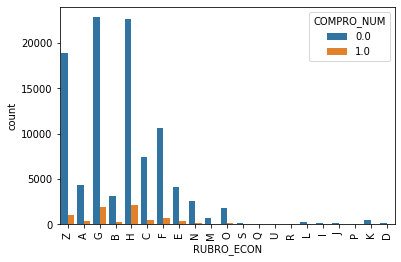

In [38]:
sns.countplot(x = "RUBRO_ECON", hue = "COMPRO_NUM", data = df1)
xticks(rotation = 90)
plt.show()

In [39]:
df1.groupby('RUBRO_ECON')["COMPRO_NUM"].mean() 

RUBRO_ECON
A    0.074742
B    0.061662
C    0.059513
D    0.029851
E    0.073315
F    0.058782
G    0.078844
H    0.083856
I    0.016949
J    0.034188
K    0.047801
L    0.098361
M    0.038462
N    0.067901
O    0.068947
P    0.074074
Q    0.000000
R    0.037037
S    0.098446
U    0.000000
Z    0.052875
Name: COMPRO_NUM, dtype: float64

#### ANTIGUEDAD_E

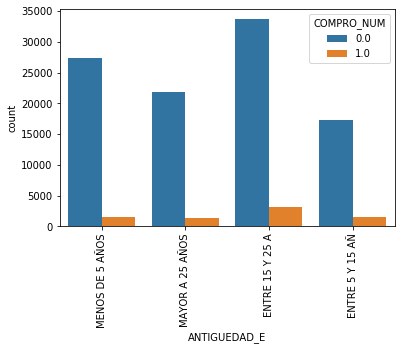

ANTIGUEDAD_E
ENTRE 15 Y 25 A    0.086293
ENTRE 5 Y 15 AÑ    0.079040
MAYOR A 25 AÑOS    0.056605
MENOS DE 5 AÑOS    0.053062
Name: COMPRO_NUM, dtype: float64

In [40]:
# la variable la optimize desde sas
sns.countplot(x = "ANTIGUEDAD_E", hue = "COMPRO_NUM", data = df1)
xticks(rotation = 90)
plt.show(),
df1.groupby('ANTIGUEDAD_E')["COMPRO_NUM"].mean() 


#### TRAMO_VENTA

In [41]:
df1.groupby('TRAMO_VENTA')["COMPRO_NUM"].mean() 

TRAMO_VENTA
1.000000     0.068054
2.000000     0.020027
3.000000     0.026869
4.000000     0.042803
5.000000     0.056723
6.000000     0.061768
7.000000     0.064459
8.000000     0.070944
9.000000     0.082234
9.043393     0.053585
10.000000    0.099934
11.000000    0.102975
12.000000    0.070152
13.000000    0.061635
Name: COMPRO_NUM, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

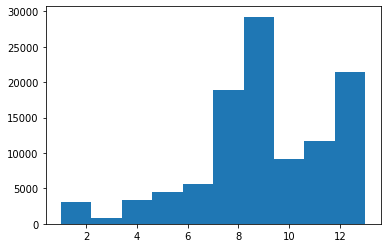

In [42]:
plt.hist(df1["TRAMO_VENTA"])
plt.show

### Numero de trabajadores

<function matplotlib.pyplot.show(*args, **kw)>

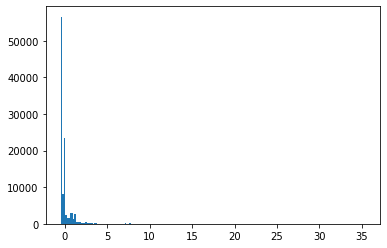

In [43]:
plt.hist(df1["NUM_TRABAJADORES"],bins=200)
plt.show



Existen aoutliers es esta variable

### REGION

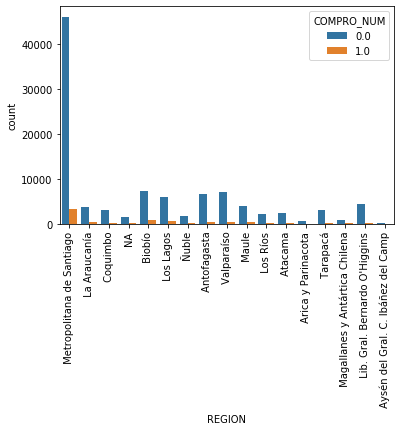

REGION
NA                                     0.051956
 Antofagasta                           0.047768
 Arica y Parinacota                    0.030710
 Atacama                               0.053667
 Aysén del Gral. C. Ibáñez del Camp    0.038889
 Biobío                                0.092234
 Coquimbo                              0.062735
 La Araucanía                          0.090189
 Lib. Gral. Bernardo O'Higgins         0.053789
 Los Lagos                             0.083449
 Los Ríos                              0.097938
 Magallanes y Antártica Chilena        0.085197
 Maule                                 0.097846
 Metropolitana de Santiago             0.065993
 Tarapacá                              0.073303
 Valparaíso                            0.055616
 Ñuble                                 0.102220
Name: COMPRO_NUM, dtype: float64

In [44]:
# la variable la optimize desde sas
sns.countplot(x = "REGION", hue = "COMPRO_NUM", data = df1)
xticks(rotation = 90)
plt.show(),
df1.groupby('REGION')["COMPRO_NUM"].mean() 


### Tipo credito usado anteriormente

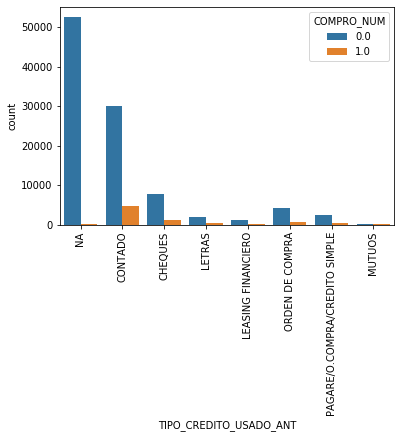

TIPO_CREDITO_USADO_ANT
CHEQUES                           0.133599
CONTADO                           0.135369
LEASING FINANCIERO                0.110023
LETRAS                            0.128741
MUTUOS                            0.107955
NA                                0.002053
ORDEN DE COMPRA                   0.148392
PAGARE/O.COMPRA/CREDITO SIMPLE    0.116149
Name: COMPRO_NUM, dtype: float64

In [45]:
sns.countplot(x = "TIPO_CREDITO_USADO_ANT", hue = "COMPRO_NUM", data = df1)
xticks(rotation = 90)
plt.show(),
df1.groupby('TIPO_CREDITO_USADO_ANT')["COMPRO_NUM"].mean() 

Esto tiene poca logica, pero se usa, si el cliente compra antes, tengo el tipo de credito que ocupa, pero voy a agrupar

In [46]:
df1['TIPO_CREDITO_USADO_ANT'] = df1['TIPO_CREDITO_USADO_ANT'].replace('PAGARE/O.COMPRA/CREDITO SIMPLE','CREDITO')
df1['TIPO_CREDITO_USADO_ANT'] = df1['TIPO_CREDITO_USADO_ANT'].replace('LEASING FINANCIERO','LEASING')

### Ofertas realizadas anteriormente

-0.04098130550696154

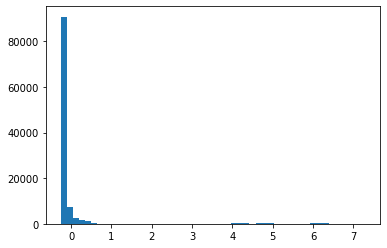

In [47]:
plt.hist(df1["NUM_OFERTAS_U12M"],bins=50)
plt.show

df1['NUM_OFERTAS_U12M'].corr(df1["COMPRO_NUM"])

### Servicios PV

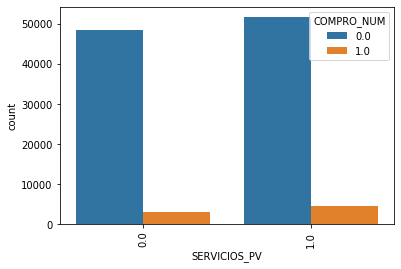

SERVICIOS_PV
0.0    0.056651
1.0    0.081653
Name: COMPRO_NUM, dtype: float64

In [48]:
sns.countplot(x = "SERVICIOS_PV", hue = "COMPRO_NUM", data = df1)
xticks(rotation = 90)
plt.show(),
df1.groupby('SERVICIOS_PV')["COMPRO_NUM"].mean() 

## Dummificacion de variables

In [49]:
def variables_dummy(dataset,variable):
    cat_dummies = pd.get_dummies(dataset[variable],prefix=variable)
    #.iloc[:,1:]
    data_new = dataset.join(cat_dummies)
    dataset = data_new.drop([variable],axis=1)
    return dataset

In [50]:
df3=df1

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107726 entries, 31 to 212228
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   RUBRO_ECON                107726 non-null  object 
 1   ANTIGUEDAD_E              107726 non-null  object 
 2   TRAMO_VENTA               107726 non-null  float64
 3   NUM_TRABAJADORES          107726 non-null  float64
 4   TOTAL_UTILITARIOS         107726 non-null  float64
 5   UTILITARIOS_EXCLUSION     107726 non-null  float64
 6   RELEVANTE_BUSES           107726 non-null  float64
 7   RELEVANTE_CAMIONES        107726 non-null  float64
 8   RELEVANTE_RODADOS         107726 non-null  float64
 9   RELEVANTE_VANS            107726 non-null  float64
 10  RELEVANTE_CARGA           107726 non-null  float64
 11  RELEVANTE_PASAJERA        107726 non-null  float64
 12  RELEVANTE_PESADO          107726 non-null  float64
 13  RELEVANTE_CAMIONETA       107726 non-null  

In [52]:
tabla=variables_dummy(df3,"ANTIGUEDAD_E")
tabla=variables_dummy(tabla,"DESC_TIPO_VEHICULO")
tabla=variables_dummy(tabla,"MARCA_AGRUPADA")
tabla=variables_dummy(tabla,"RUBRO_ECON")
tabla=variables_dummy(tabla,"REGION")
#tabla=variables_dummy(tabla,"COMUNA_CRM")
tabla=variables_dummy(tabla,"USADO_NUEVO")
tabla=variables_dummy(tabla,"TIPO_CREDITO_USADO_ANT")


In [53]:
y=tabla["COMPRO_NUM"]
x=tabla.drop(["COMPRO_NUM"], axis=1)

In [54]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107726 entries, 31 to 212228
Data columns (total 97 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   TRAMO_VENTA                                    107726 non-null  float64
 1   NUM_TRABAJADORES                               107726 non-null  float64
 2   TOTAL_UTILITARIOS                              107726 non-null  float64
 3   UTILITARIOS_EXCLUSION                          107726 non-null  float64
 4   RELEVANTE_BUSES                                107726 non-null  float64
 5   RELEVANTE_CAMIONES                             107726 non-null  float64
 6   RELEVANTE_RODADOS                              107726 non-null  float64
 7   RELEVANTE_VANS                                 107726 non-null  float64
 8   RELEVANTE_CARGA                                107726 non-null  float64
 9   RELEVANTE_PASAJERA                  

# Inicio de modelamiento

### Datos entrenamiento y testeo

como esta desbalanceado, primero divido la muestra pero por estratos

In [55]:
x_res,x_test,y_res,y_test=train_test_split(x,y,test_size=0.2,random_state=1010)

Revisamos como quedan las separaciones

In [56]:
y_res.mean(),y_test.mean(),y_res.shape,y_test.shape

(0.06919238802506382, 0.07184628237259816, (86180,), (21546,))

Tenemos un problema con datos desbalanceados, por lo que revisemos como se comporta este desbalance utilizando un modelo sde random forest como base inicial

In [57]:
modelo_rfc = RandomForestClassifier().fit(x_res, y_res)

In [58]:
#evaluacion del modelo
mediciones(x_res,y_res,x_test,y_test,modelo_rfc)   

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                 19351                   647
Actual verdadera              1327                   221


,Entrenamiento,Testeo
Accuracy,0.978,0.908
recall,0.742,0.142
roc,0.994,0.797
f1,0.825,0.182


El recall es muy bajo y se ve afectado el f1, es necesario balancear los datos

### Balanceo de datos de entrenamiento

Tengo la opcion de bajar o subir la muestra, a modo de no perder informacion se sube

In [59]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE 
nm = SMOTE(random_state = 10101) 
#nm = NearMiss(random_state = 10101)

Using TensorFlow backend.


In [60]:
x_train,y_train=nm.fit_resample(x_res,y_res)

Reviso dimenciones nuevamente

In [61]:
y_res.shape, y_res.mean(), y_train.shape,y_train.mean()

((86180,), 0.06919238802506382, (160434,), 0.5)

paso de 151 mil datos de entrenamiento a 280, mediante resample

# Modelamiento con datos balanceados

La estrategia en este caso es utilizar regresion logistica, en el caso de obtener un pobre ajuste, se utilitan varios modelos para probar

## Regresion logistica como modelo base

Utilizo regresion loistica y una busqueda por gridsearch para encontrar mejores hiperparametros

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


grid={"C":np.logspace(-3,3,3), "penalty":["l2"]}

logreg=LogisticRegression()

logreg_cv=GridSearchCV(logreg,grid,cv=5,scoring='f1',verbose=0)

In [63]:
logreg_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e+00, 1.e+03]),
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [64]:
logreg_cv.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [65]:
logreg=LogisticRegression(C=1,penalty='l2')
logreg.fit(x_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
mediciones(x_train,y_train,x_test,y_test,logreg)   

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                 16393                  3605
Actual verdadera               799                   749


,Entrenamiento,Testeo
Accuracy,0.836,0.795
recall,0.849,0.483
roc,0.935,0.793
f1,0.838,0.253


Se aprecia un claro bajo ajuste, veamos si aplicamos otros modelos podemos mejorar esto (al menos el recall y press deben estar sobre 50%)

## Multi-modelos

Para evita probar uno a uno los modelos, se seleccionan varios y luego se verifica los con mejor rendimiento para hacer una busqueda ampliada de los mejores con gridsearch

In [67]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier,StackingClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier          
              

modelos = [["LR","SVC","RF","TREE","MLP","GBOOST","ADABOOST","GRBOOST"],
           [
            LogisticRegression(C=1,penalty='l2'),  
            svm.SVC(max_iter=50),
            RandomForestClassifier(),
            DecisionTreeClassifier(),
            MLPClassifier(),
            GaussianNB(),
            AdaBoostClassifier(),
            GradientBoostingClassifier()]
          ]
warnings.filterwarnings("ignore")

resultados=[]
predicion=[]
error=[]
precision=[]
a=0
for i in modelos[1]:
    ajuste=i.fit(x_train,y_train)
    resultados.append(ajuste)
    predicion.append(ajuste.predict(x_test))
    er = i.score(x_test,y_test)
    error.append(er)
    precision.append(ajuste.score(x_test , y_test))
    print("\n modelo:",modelos[0][a])
    print(mediciones2(x_train,y_train,x_test,y_test,ajuste))
    print("f1 score:",int(f1_score(y_test,ajuste.predict(x_test))*1000)/1000)
    if modelos[0][a]!='SVC':
        print("roc-auc:", roc_auc_score(y_test,ajuste.predict_proba(x_test)[:,1]))
    print(confusion_matrix(y_test,ajuste.predict(x_test)))
    a=a+1


 modelo: LR
          Testeo
Accuracy   0.795
recall     0.483
f1 score: 0.253
roc-auc: 0.7934177300158956
[[16393  3605]
 [  799   749]]

 modelo: SVC
          Testeo
Accuracy   0.517
recall     0.572
f1 score: 0.145
[[10258  9740]
 [  662   886]]

 modelo: RF
          Testeo
Accuracy   0.897
recall     0.218
f1 score: 0.234
roc-auc: 0.8035044460518401
[[18989  1009]
 [ 1209   339]]

 modelo: TREE
          Testeo
Accuracy   0.905
recall     0.299
f1 score: 0.312
roc-auc: 0.6498385626676362
[[19038   960]
 [ 1084   464]]

 modelo: MLP
          Testeo
Accuracy   0.870
recall     0.277
f1 score: 0.235
roc-auc: 0.789767025798187
[[18319  1679]
 [ 1118   430]]

 modelo: GBOOST
          Testeo
Accuracy   0.593
recall     0.950
f1 score: 0.251
roc-auc: 0.7561292304941089
[[11322  8676]
 [   77  1471]]

 modelo: ADABOOST
          Testeo
Accuracy   0.689
recall     0.752
f1 score: 0.258
roc-auc: 0.7956587163884348
[[13681  6317]
 [  383  1165]]

 modelo: GRBOOST
          Testeo
Accurac

Siguiente paso es usar gridsearch para buscar la mejor version de cada uno usando como referencia para los mejores en f1 (arbol de decision, random forest, mlp, adaboost)

## Tree Clasificador Tunning

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(1,8,1)), 
              "min_samples_leaf": list(range(5,18,1))}

tree_cv = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=3,n_jobs=-1,verbose=10).fit(x_train,y_train)


Fitting 3 folds for each of 182 candidates, totalling 546 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

In [69]:
mediciones(x_train,y_train,x_test,y_test,tree_cv)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                 11972                  8026
Actual verdadera               180                  1368


,Entrenamiento,Testeo
Accuracy,0.780,0.619
recall,0.958,0.883
roc,0.850,0.784
f1,0.813,0.250


No mejoro mucho respecto a lo que ya estaba ajustado (claso sobre ajuste)

## Random Forest Tunning

In [70]:
## from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators'      : [25,30,50],
    'max_depth'         : [8,10,15],
    'random_state'      : [0]}

rf_cv = GridSearchCV(RandomForestClassifier(), parameters, cv=3, n_jobs=-1,verbose=10).fit(x_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done  15 out of  27 | elapsed:   31.7s remaining:   25.3s
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:   41.1s remaining:   20.5s
[Parallel(n_jobs=-1)]: Done  21 out of  27 | elapsed:   44.0s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:   49.8s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   55.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   55.2s finished


In [71]:
rf_cv.best_params_

{'max_depth': 15, 'n_estimators': 50, 'random_state': 0}

In [72]:
mediciones(x_train,y_train,x_test,y_test,rf_cv)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                 15628                  4370
Actual verdadera               600                   948


,Entrenamiento,Testeo
Accuracy,0.893,0.769
recall,0.983,0.612
roc,0.975,0.814
f1,0.901,0.276


Los modelos que revisare en mayor profundidad son la rn, adaboost y randomforest

## Adaboost con grid search

In [88]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000],'learning_rate':[.001,0.01,.1]}
gs=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=-1,cv=5,verbose=10)

In [89]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 38.5min remaining: 22.3min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 42.4min remaining: 12.9min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 51.8min remaining:  5.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 52.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=10)

In [90]:
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [91]:
mediciones(x_train,y_train,x_test,y_test,gs)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                 13428                  6570
Actual verdadera               329                  1219


,Entrenamiento,Testeo
Accuracy,0.816,0.679
recall,0.958,0.787
roc,0.932,0.803
f1,0.839,0.261


Teniendo en cuenta los ajustes actuales es un buen ajuste pero el recall es muy bajo, veamos mas opciones

## Clasificador por Multi-Layer-Perc.  (RN)

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

parameters = {'solver': ['lbfgs'], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[10101]}
mlp_cv = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1,verbose=10,cv=3,scoring='f1')


In [78]:
mlp_cv.fit(x_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  9.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.

In [79]:
mlp_cv.best_params_

{'alpha': 0.1,
 'hidden_layer_sizes': 12,
 'random_state': 10101,
 'solver': 'lbfgs'}

In [80]:
mediciones(x_train,y_train,x_test,y_test,mlp_cv)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                 16477                  3521
Actual verdadera               816                   732


,Entrenamiento,Testeo
Accuracy,0.840,0.798
recall,0.853,0.472
roc,0.936,0.794
f1,0.842,0.252


Mejora el recall pero caemos en el accuracy, igualmente roc esta muy bueno

Ya tengo la mejor version de estos 3 modelos, antes de escojer uno de ellos ¿juntemoslos todos y veamos si la union de todos es mejor que uno solo?

In [81]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

modelos =[('ada',AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20))),
('mlp',MLPClassifier(alpha=0.1,hidden_layer_sizes=14,random_state= 10101,solver='lbfgs')),
('rfc',RandomForestClassifier(max_depth=15,n_estimators=50,random_state=0))]

modelo_salida = LogisticRegression(C= 1000, penalty= 'l2')

#voy a forzarlo a usar las variables predictoras con las predichas
stack=StackingClassifier(estimators=modelos, final_estimator=modelo_salida,n_jobs=1,passthrough=True,verbose=10)

stack.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elap

StackingClassifier(cv=None,
                   estimators=[('ada',
                                AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                         class_weight=None,
                                                                                         criterion='gini',
                                                                                         max_depth=20,
                                                                                         max_features=None,
                                                                                         max_leaf_nodes=None,
                                                                                         min_impurity_decrease=0.0,
                                                                                         min_impurity_spl

In [82]:
mediciones(x_train,y_train,x_test,y_test,stack)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                 18990                  1008
Actual verdadera              1149                   399


,Entrenamiento,Testeo
Accuracy,0.982,0.899
recall,0.983,0.257
roc,0.998,0.822
f1,0.982,0.270


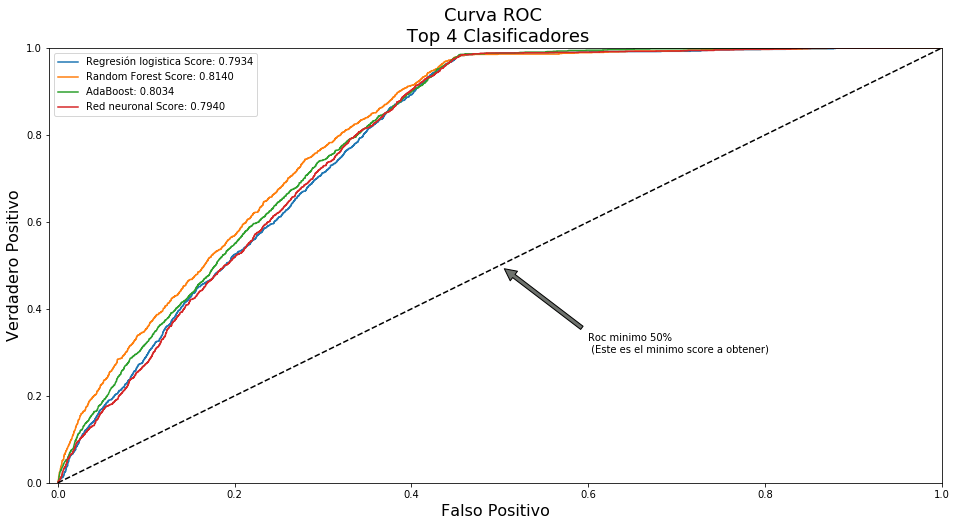

In [92]:
log_reg_pred = logreg_cv.predict_proba(x_test)[:,1]
rf_pred = rf_cv.predict_proba(x_test)[:,1]
ada_pred = gs.predict_proba(x_test)[:,1]
rn_pred = mlp_cv.predict_proba(x_test)[:,1]

log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, rf_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, ada_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test,rn_pred)


plt.figure(figsize=(16,8))
plt.title('Curva ROC \n Top 4 Clasificadores', fontsize=18)
plt.plot(log_fpr, log_tpr, label='Regresión logistica Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_pred)))
plt.plot(knear_fpr, knear_tpr, label='Random Forest Score: {:.4f}'.format(roc_auc_score(y_test, rf_pred)))
plt.plot(svc_fpr, svc_tpr, label='AdaBoost: {:.4f}'.format(roc_auc_score(y_test, ada_pred)))
plt.plot(tree_fpr, tree_tpr, label='Red neuronal Score: {:.4f}'.format(roc_auc_score(y_test, rn_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('Falso Positivo', fontsize=16)
plt.ylabel('Verdadero Positivo', fontsize=16)
plt.annotate('Roc minimo 50% \n (Este es el minimo score a obtener)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.legend()
    
plt.show()

# Conclusión Camiones

En todos los modelos balaneados es posible apreciar un sobre ajuste de los valores, sin embargo es importante indicar que para el problema en cuestion es prioritario no desechar lead buenos e intentar desechar lead malos. por este motivo busco el mejor equilibrio entre recall y accuracy, evitando descuidar el presicion.

Tal contexto lleva a dejar al modelo RF con el mejor comportamiento.

Confusion matrix Random Forest:
 [[15628  4370]
 [  600   948]]


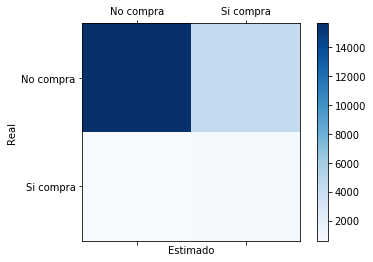

In [84]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=rf_cv.predict(x_test))
print('Confusion matrix Random Forest:\n', conf_mat)

labels = ['No compra', 'Si compra']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Estimado')
plt.ylabel('Real')
plt.show()

# Exportación del modelo

In [87]:
import pickle

filename = 'lead_score_camiones_empresa_modelo.sav'

pickle.dump(rf_cv, open(filename, 'wb'))

In [85]:
from sklearn.neighbors import KNeighborsClassifier


k_range = list(range(5,20))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 3, scoring = 'accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [86]:
mediciones(x_train,y_train,x_test,y_test,grid)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                 18722                  1276
Actual verdadera              1194                   354


,Entrenamiento,Testeo
Accuracy,0.985,0.885
recall,0.973,0.228
roc,0.999,0.676
f1,0.984,0.222


In [93]:
for feat, importance in zip(x_train.columns,rf_cv.best_estimator_.feature_importances_):
    print ('feature: {f}, importance: {i}'.format(f=feat, i=importance))

feature: TRAMO_VENTA, importance: 0.014642767229801365
feature: NUM_TRABAJADORES, importance: 0.02292948162385985
feature: TOTAL_UTILITARIOS, importance: 0.024554501402576426
feature: UTILITARIOS_EXCLUSION, importance: 0.04111008924918936
feature: RELEVANTE_BUSES, importance: 0.0019449744509620088
feature: RELEVANTE_CAMIONES, importance: 0.022123749557311608
feature: RELEVANTE_RODADOS, importance: 0.007147249617810446
feature: RELEVANTE_VANS, importance: 0.02136291465714063
feature: RELEVANTE_CARGA, importance: 0.013211812498420567
feature: RELEVANTE_PASAJERA, importance: 0.011322708054787451
feature: RELEVANTE_PESADO, importance: 0.019725475754816594
feature: RELEVANTE_CAMIONETA, importance: 0.0028622633155951705
feature: RELEVANTE_MEDIANO, importance: 0.010756784171346175
feature: RELEVANTE_OTROS, importance: 0.014264369349416158
feature: RELEVANTE_LIVIANO, importance: 0.004345601462206655
feature: RELEVANTE_CAMIONETA_DCAB, importance: 0.0012241938424175606
feature: RELEVANTE_FORESTA